In [310]:
import numpy as np #linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from matplotlib.colors import ListedColormap
from scipy.spatial.distance import cdist 
from sklearn.datasets import load_digits

In [311]:
#data = pd.read_csv('Iris.csv')
iris = load_iris()

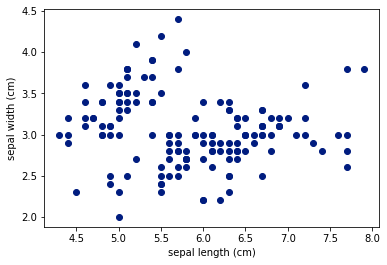

In [312]:
data = pd.DataFrame(iris.data)                                                               #QUESTION 1                        
data.columns = iris.feature_names              
data['label'] = iris.target
data.head()
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
# create a scatter plot of SEPAL WIDTH versus SEPAL LENGTH and color by SPECIES
plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'], cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

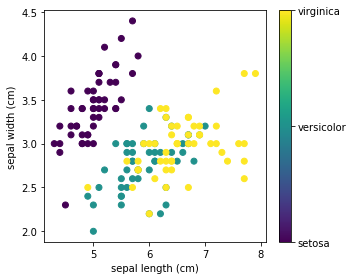

In [313]:
x_index = 0                                                                               #QUESTION 2 
y_index = 1 

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

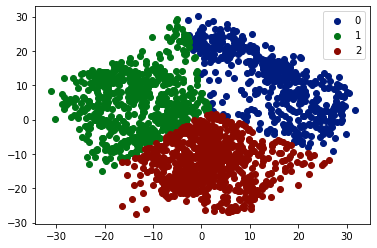

In [314]:
def kmeans(x,k, no_of_iterations):#Defining our function                                      #QUESTION 3
    idx = np.random.choice(len(x), k, replace=False)
    #Randomly choosing Centroids 
    centroids = x[idx, :] #Step 1
     
    #finding the distance between centroids and all the data points
    distances = cdist(x, centroids ,'euclidean') #Step 2
     
    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) #Step 3
     
    #Repeating the above steps for a defined number of iterations
    #Step 4
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) #Updated Centroids 
         
        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
         
    return points 
 
 
#Load Data
data = load_digits().data
pca = PCA(2)
  
#Transform the data
df = pca.fit_transform(data)
 
#Applying our function
label = kmeans(df,3,150)
 
#Visualize the results
 
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()


In [315]:
iris = datasets.load_iris()                                                          #QUESTION 4 
df = pd.DataFrame({ 
    'x': iris.data[:,0],
    'y': iris.data[:,1],
    'cluster' : iris.target
})

In [316]:
centroids = {}                                                                       #CONTINUE OF Q4
for i in range(3):  
    result_list = []
    result_list.append(df.loc[df['cluster'] == i]['x'].mean())
    result_list.append(df.loc[df['cluster'] == i]['y'].mean())
    
    centroids[i] = result_list

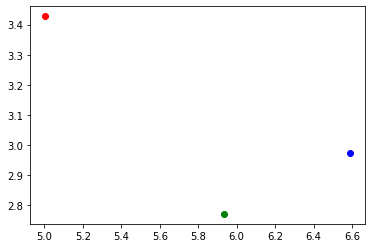

In [317]:
colmap = {0: 'r', 1: 'g', 2: 'b'}                                                    #CONTINUE OF Q4
for i in range(3):
    plt.scatter(centroids[i][0],centroids[i][1], color=colmap[i])
plt.show()

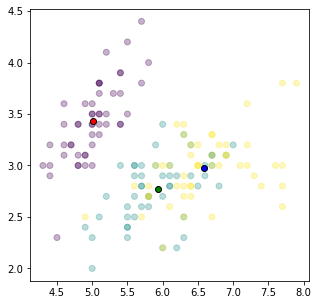

In [318]:
fig = plt.figure(figsize=(5, 5))                                                            #CONTINUE OF Q4
plt.scatter(df['x'], df['y'], c=iris.target,alpha = 0.3)
colmap = {0: 'r', 1: 'g', 2: 'b'}
col = [0,1]
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1], c=colmap[i], edgecolor='k')
plt.show()

In [319]:
def assignment(df, centroids):                                                              #CONTINUE OF Q4
    for i in range(3):
        # sqrt((x1 - x2)^2 + (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

In [320]:
df = assignment(df, centroids)                                                               #CONTINUE OF Q4

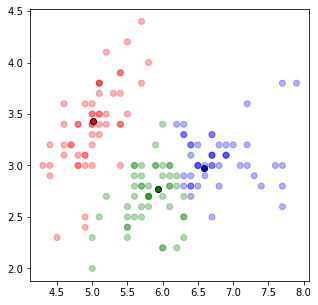

In [321]:
fig = plt.figure(figsize=(5, 5))                                                              #CONTINUE OF Q4 
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.3)
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i], edgecolor='k')

plt.show()

In [322]:
def update(k):                                                                                #CONTINUE OF Q4
    for i in range(3):
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

In [323]:
centroids = update(centroids)                                                                    #CONTINUE OF Q4

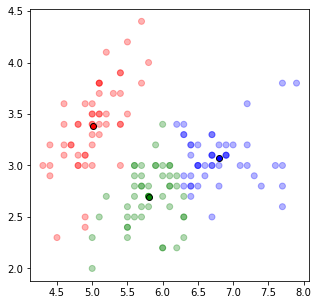

In [324]:
fig = plt.figure(figsize=(5, 5))                                                                   #CONTINUE OF Q4
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.3)
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i], edgecolor='k')

plt.show()

In [325]:
df = assignment(df, centroids)                                                                        #CONTINUE OF Q4

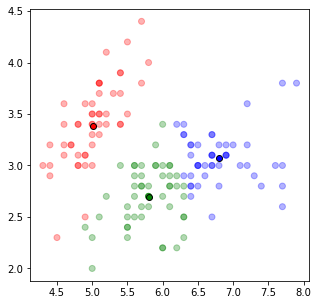

In [326]:
fig = plt.figure(figsize=(5, 5))                                                                      #CONTINUE OF Q4
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.3)
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1], color=colmap[i], edgecolor='k')
plt.show()

In [327]:
while True:                                                                                      #CONTINUE OF Q4
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

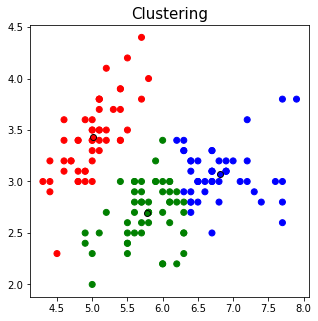

In [328]:
fig = plt.figure(figsize=(5, 5))                                                                  #END OF QUESTION4
plt.scatter(df['x'], df['y'], color=df['color'])
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1], color=colmap[i], edgecolor='k')

plt.title("Clustering", size=15)

plt.show()



TypeError: float() argument must be a string or a number, not 'PathCollection'

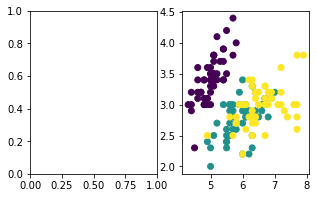

In [329]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))                                       #QUESTION 5
axes[0].plot(plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target))
axes[1].plot(plt.scatter(centroids[2][0],centroids[2][1], color=colmap[2], edgecolor='k'))
fig.tight_layout()
fig = plt.figure(figsize=(5, 5))                                                                  
plt.scatter(df['x'], df['y'], color=df['color'])

In [ ]:
#When I see these plots, I realize that there is no too much difference between them. The plots are pretty similar but 
#the plot by clustering might have difference cause of clustering method. When I eliminate the plots and want to determine the 
#number of these differences, it is pretty less. After that, it might be ignored. Mostly, the method is reliable.